In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("USA_ACCIDENTS.csv.zip")
df

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9
1,1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9
2,2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0
3,3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1
4,4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0
...,...,...,...,...,...,...,...,...
7728389,7728389,A-7777757,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,86.0
7728390,7728390,A-7777758,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,70.0
7728391,7728391,A-7777759,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,73.0
7728392,7728392,A-7777760,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,71.0


In [7]:
df.head()

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9
1,1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9
2,2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0
3,3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1
4,4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0


In [11]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City',
       'State', 'Temperature(F)'],
      dtype='object')


In [15]:
df.dtypes.value_counts()

object     4
float64    3
int64      1
Name: count, dtype: int64

In [17]:
df.shape 

(7728394, 8)

In [19]:
df.describe()

,Unnamed: 0,Start_Lat,Start_Lng,Temperature(F)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06
mean,3.864196e+06,3.620119e+01,-9.470255e+01,6.166329e+01
std,2.230995e+06,5.076079e+00,1.739176e+01,1.901365e+01
min,0.000000e+00,2.455480e+01,-1.246238e+02,-8.900000e+01
25%,1.932098e+06,3.339963e+01,-1.172194e+02,4.900000e+01
50%,3.864196e+06,3.582397e+01,-8.776662e+01,6.400000e+01
75%,5.796295e+06,4.008496e+01,-8.035368e+01,7.600000e+01
max,7.728393e+06,4.900220e+01,-6.711317e+01,2.070000e+02


In [21]:
df.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

In [25]:
critical_columns = ['Start_Lat', 'Start_Lng', 'City', 'State', 'Start_Time']

# Check for missing values in each critical column
missing_values = df[critical_columns].isnull().sum()

# Display the result
print("Missing values in critical columns:")
print(missing_values)

# Percentage of missing values
missing_percentage = (df[critical_columns].isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in critical columns:")
print(missing_percentage)

Missing values in critical columns:
Start_Lat       0
Start_Lng       0
City          253
State           0
Start_Time      0
dtype: int64

Percentage of missing values in critical columns:
Start_Lat     0.000000
Start_Lng     0.000000
City          0.003274
State         0.000000
Start_Time    0.000000
dtype: float64


In [27]:
df_cleaned = df.dropna(subset=critical_columns)
print(f"Data after dropping missing values: {df_cleaned.shape}")


Data after dropping missing values: (7728141, 8)


In [29]:


# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'ID']  # Specify the columns to drop
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')  # Use 'errors="ignore"' to avoid errors if columns are missing

# Display the shape of the cleaned dataset
print(f"Dataset shape after dropping columns: {df_cleaned.shape}")

# Save the cleaned dataset (optional)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Dataset shape after dropping columns: (7728394, 6)


In [31]:
try:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    print("Start_Time column successfully converted to datetime format.")
except Exception as e:
    print(f"An error occurred: {e}")

# Check for any rows where conversion failed
invalid_times = df[df['Start_Time'].isnull()]
if not invalid_times.empty:
    print(f"There are {len(invalid_times)} rows with invalid Start_Time values.")
else:
    print("No invalid Start_Time values found.")

Start_Time column successfully converted to datetime format.
There are 743166 rows with invalid Start_Time values.


In [33]:
print(df['Start_Time'].dtypes) 


datetime64[ns]


In [35]:
df['Hour'] = df['Start_Time'].dt.hour  # Extract hour of the day
df['Day_of_Week'] = df['Start_Time'].dt.day_name()  # Extract day of the week (e.g., Monday)
df['Month'] = df['Start_Time'].dt.month_name()  # Extract month name (e.g., January)

# Display a sample of the new columns
print(df[['Start_Time', 'Hour', 'Day_of_Week', 'Month']].head())

           Start_Time  Hour Day_of_Week     Month
0 2016-02-08 05:46:00   5.0      Monday  February
1 2016-02-08 06:07:59   6.0      Monday  February
2 2016-02-08 06:49:27   6.0      Monday  February
3 2016-02-08 07:23:34   7.0      Monday  February
4 2016-02-08 07:39:07   7.0      Monday  February


In [49]:
!pip install folium


In [55]:
import folium
from folium.plugins import HeatMap


# Load the dataset

# Ensure latitude and longitude columns are not null
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Initialize the map centered around the mean coordinates
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
heatmap = folium.Map(location=map_center, zoom_start=6)

# Prepare data for the heatmap
heat_data = df[['Start_Lat', 'Start_Lng']].values.tolist()

# Add HeatMap layer
HeatMap(heat_data).add_to(heatmap)

# Save the map as an HTML file
heatmap.save('accident_hotspots.html')

print("Heatmap saved as 'accident_hotspots.html'")


Heatmap saved as 'accident_hotspots.html'


In [61]:
df = df.dropna(subset=['City', 'State'])

# Count accidents per City
city_accident_counts = df['City'].value_counts()

# Display the top 10 cities with the highest number of accidents
print("Top 10 cities with the highest number of accidents:")
print(city_accident_counts.head(10))

# Count accidents per State
state_accident_counts = df['State'].value_counts()

# Display accidents per State
print("\nAccidents per State:")
print(state_accident_counts)

Top 10 cities with the highest number of accidents:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

Accidents per State:
State
CA    1741422
FL     880159
TX     582837
SC     382557
NY     347932
NC     338199
VA     303301
PA     296620
MN     192079
OR     179655
AZ     170609
GA     169234
IL     168956
TN     167386
MI     162189
LA     149701
NJ     140719
MD     140408
OH     118115
WA     108221
AL     101044
UT      97079
CO      90877
OK      83647
MO      77323
CT      71005
IN      67219
MA      61996
WI      34686
KY      32254
NE      28870
MT      28496
IA      26306
AR      22780
NV      21665
KS      20991
DC      18493
RI      16971
MS      15181
DE      14097
WV      13791
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        9

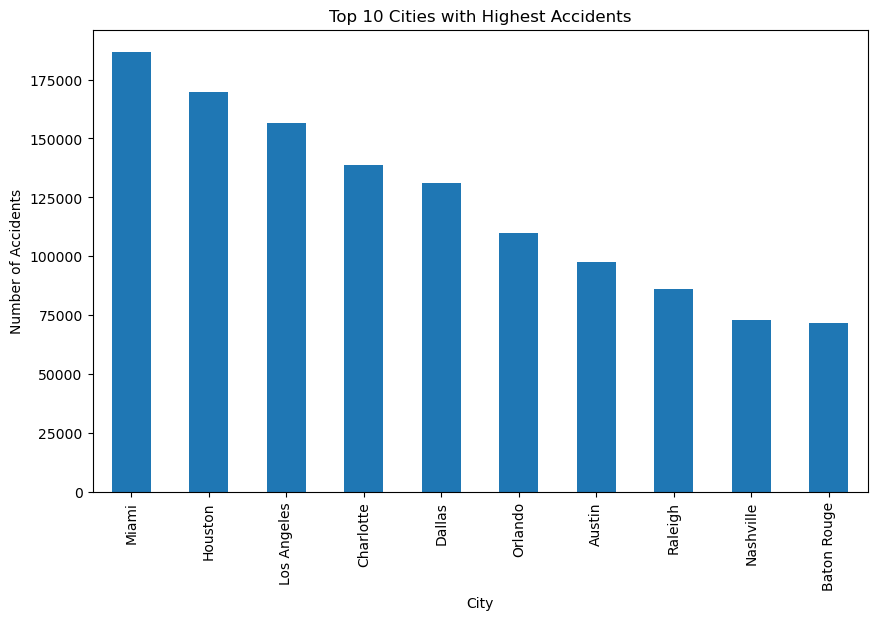

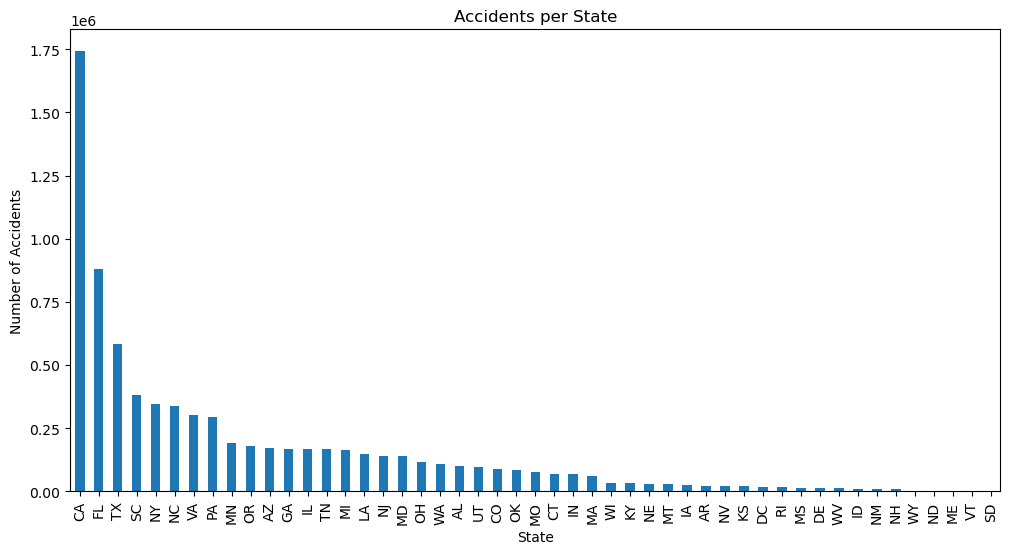

In [72]:
import matplotlib.pyplot as plt

# Plot top 10 cities with the highest accidents
city_accident_counts.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Cities with Highest Accidents")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.show()

# Plot accidents per state
state_accident_counts.plot(kind='bar', figsize=(12, 6), title="Accidents per State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


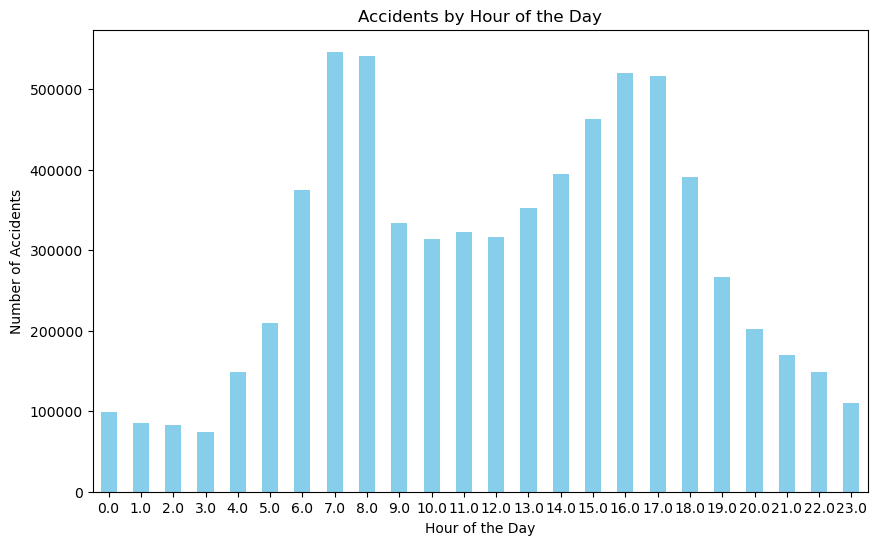

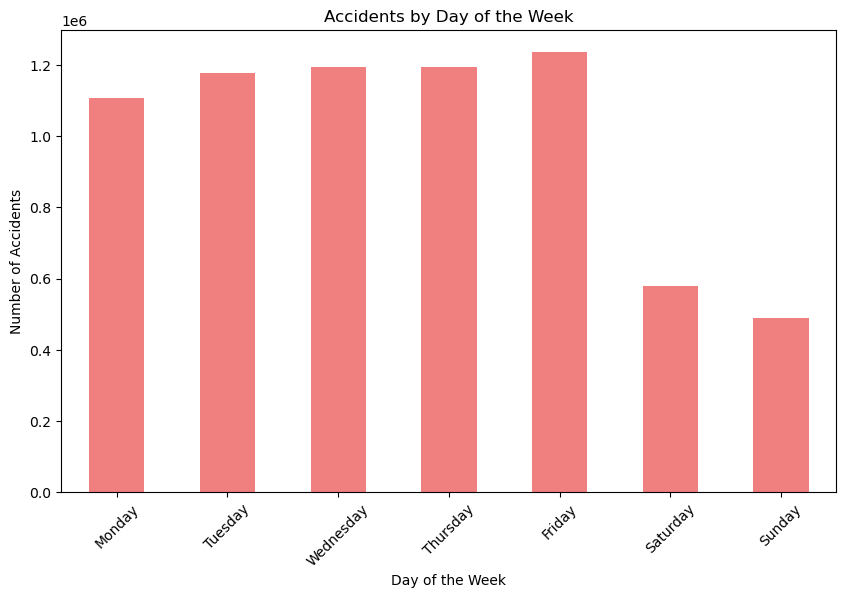

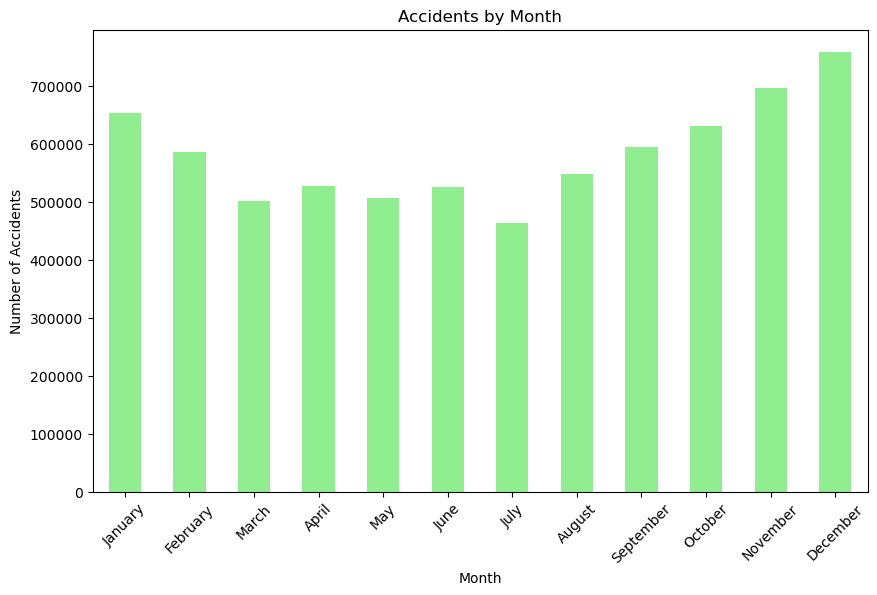

In [74]:
hourly_accidents = df['Hour'].value_counts().sort_index()

# 2. **Accidents by Day of the Week**
day_accidents = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 3. **Accidents by Month**
month_accidents = df['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting the results

# Accidents by Hour
plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Accidents by Day of the Week
plt.figure(figsize=(10, 6))
day_accidents.plot(kind='bar', color='lightcoral')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accidents by Month
plt.figure(figsize=(10, 6))
month_accidents.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

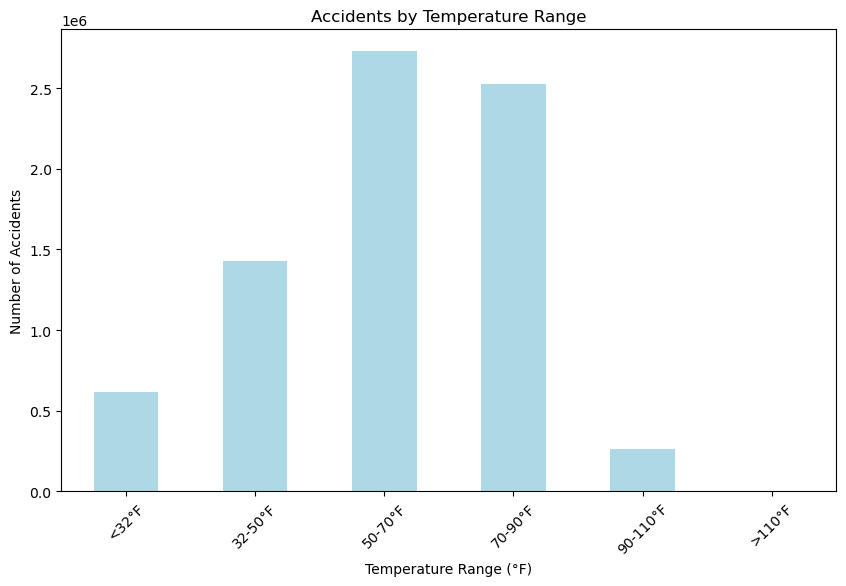

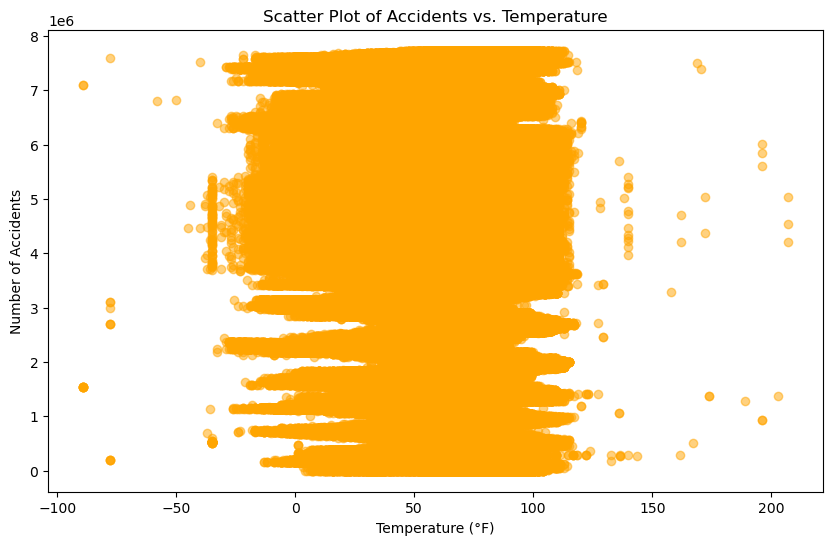

In [76]:

# Create temperature ranges
bins = [-float('inf'), 32, 50, 70, 90, 110, float('inf')]  # Define bins for temperature ranges
labels = ['<32°F', '32-50°F', '50-70°F', '70-90°F', '90-110°F', '>110°F']
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bins, labels=labels)

# Count accidents per temperature range
temp_accident_counts = df['Temp_Range'].value_counts().sort_index()

# Plot accidents by temperature range
plt.figure(figsize=(10, 6))
temp_accident_counts.plot(kind='bar', color='lightblue')
plt.title('Accidents by Temperature Range')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Optional: Scatter plot of accidents vs. Temperature (F)
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature(F)'], df.index, alpha=0.5, color='orange')
plt.title('Scatter Plot of Accidents vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Accidents')
plt.show()
